## Newton's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def f(x, a=1, b=0, c=1):
  return a * (x[0] - 2) ** 2 + (x[1] - 1) ** 2 + b * x[0] * x[1] + c * np.sin(x[0])

In [83]:
def f_grad(x, a=1, b=0, c=1):
    return np.array([2 * a * (x[0] - 2) + b * x[1] + c * np.cos(x[0]), 2 * (x[1] - 1) + b * x[0]])

In [84]:
def f_hes(x, a=1, b=0, c=1):
    return np.array([
        [2 * a - c * np.sin(x[0]), b],
        [b, 2]
    ])

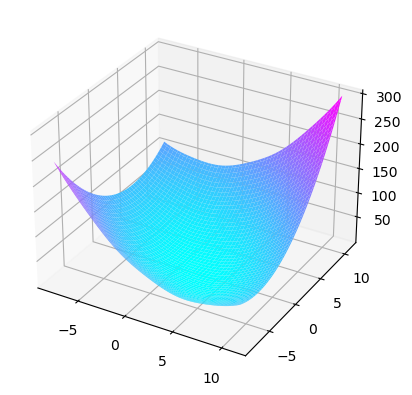

In [85]:
fig = plt.figure()
ax = plt.axes(projection='3d')

d = 10

X = np.linspace(2-d, 1+d, 100)
Y = np.linspace(2-d, 1+d, 100)

X, Y = np.meshgrid(X, Y)
Z = f([X, Y], b=1)

ax.plot_surface(X, Y, Z, cmap='cool')
plt.show()

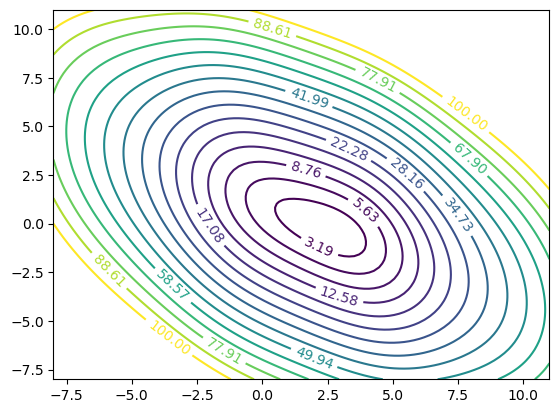

In [86]:
fig, ax = plt.subplots()

q = ax.contour(X, Y, Z, levels=np.linspace(Z.min(), 10, 15)**2)
ax.clabel(q, inline=True, fontsize=10)

plt.show()

In [87]:
N = 10
alpha = 1

In [88]:
a, b, c = 5, 1, 10

x0 = np.random.uniform(-10, 10, 2)
x_history = [x0]

for i in range(N):
    x = x_history[-1]
    hes = f_hes(x, a, b)
    hesinv = np.linalg.inv(hes)
    x_next = x - alpha * hesinv @ f_grad(x, a, b)
    x_history.append(x_next)

x_history = np.array(x_history)

In [89]:
x_history

array([[ 6.27201207, -8.67909766],
       [ 1.8998855 ,  0.05005725],
       [ 2.04885898, -0.02442949],
       [ 2.04838286, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143],
       [ 2.04838285, -0.02419143]])

In [90]:
f(x_history.T, a, b)

array([130.48878885,   1.99394594,   1.89922708,   1.89922611,
         1.89922611,   1.89922611,   1.89922611,   1.89922611,
         1.89922611,   1.89922611,   1.89922611])

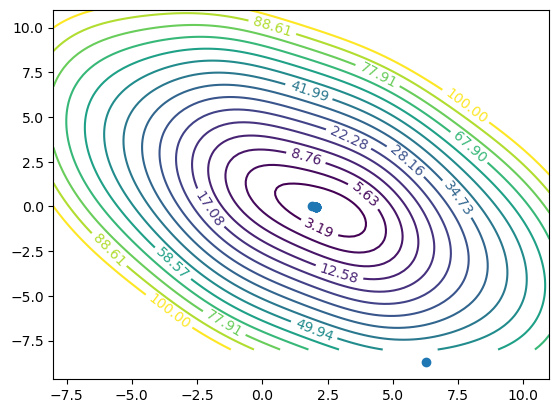

In [91]:
fig, ax = plt.subplots()

q = ax.contour(X, Y, Z, levels=np.linspace(Z.min(), 10, 15)**2)
ax.clabel(q, inline=True, fontsize=10)

ax.scatter(*x_history.T)

plt.show()